In [1]:
## Importing the Dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from mlxtend.plotting import plot_decision_regions # To plot the decision boundaries

import warnings
warnings.filterwarnings('ignore')

In [2]:
## Creating own dataframe

df = pd.DataFrame()

In [3]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,2,6,8,1,9,5,8,9,2]
df['Label'] = [1,1,0,1,0,1,0,1,0,0]

In [4]:
#checking the dataset
df

,X1,X2,Label
0,1,5,1
1,2,2,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


In [5]:
## Its a classification Data with Label as Target

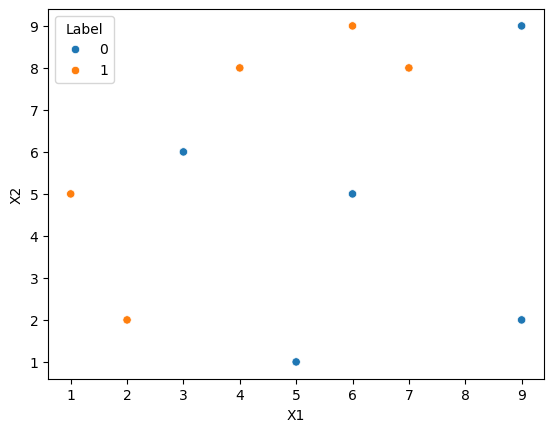

In [6]:
## Plotting the data

sns.scatterplot(x=df.X1, y=df.X2, hue=df.Label)
plt.show()

In [7]:
## Step 1 in Adaboost 

## Assigning Equal Weights to the Each Row i.e 1/no.of rows 

df['Weights'] = 1/df.shape[0]

In [8]:
df ## Checking the result

,X1,X2,Label,Weights
0,1,5,1,0.1
1,2,2,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [14]:
# As observed each row has the same weight 


# Step2 : Create a shallow Decision tree with Depth=1 i.e Decision Stump

from sklearn.tree import DecisionTreeClassifier, plot_tree

dt1 = DecisionTreeClassifier(max_depth=1,random_state=2)

In [15]:
# Breaking the data into Prediction and target

x = df.iloc[:, 0:2].values
y = df.iloc[: ,2].values

# Training the Model

dt1.fit(x,y)

DecisionTreeClassifier(max_depth=1, random_state=2)

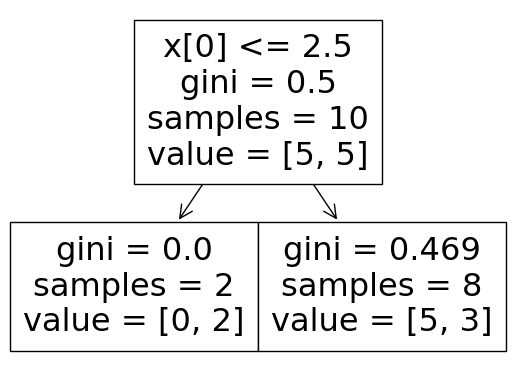

In [16]:
## Ploting the Decision Stump

plot_tree(dt1)
plt.show()

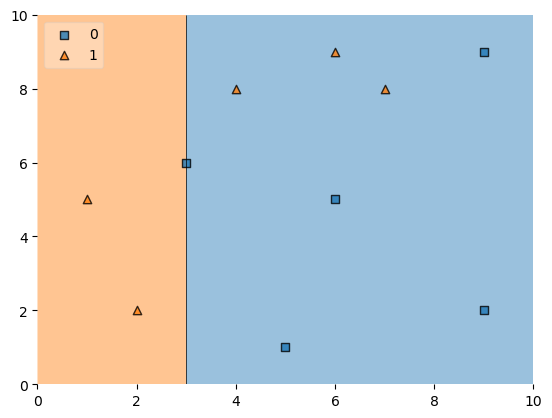

In [17]:
## Ploting the Decision Boundaries

plot_decision_regions(x,y,clf=dt1, legend=2)
plt.show()

In [18]:
## As we can see model is doing 3 wrong prrdiction in Blue region 

In [19]:
# Step 3: Calculate Y_Pred

df['y_pred'] = dt1.predict(x)

In [20]:
df

,X1,X2,Label,Weights,y_pred
0,1,5,1,0.1,1
1,2,2,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [21]:
## As observed Row 4, 6, 8 are giving misclassified by the Model

In [22]:
# Step 4: Calculate the Model Weight i.e Alpha = 1/2 * log((1-error)/error)
## error = Total Weight of Misclassified Rows 

def calculate_model_weight(error):
    return 0.5* np.log((1-error)/error)

alpha1 = calculate_model_weight(0.3) # 3 rows were misclassified and each has 0.1 weight so error = 0.1+0.1+0.1=0.3

print('Model1 Weight : ', alpha1)

Model1 Weight :  0.42364893019360184


In [23]:
# Step 4: Update the weights 

## Misclassified Row New Weight  = current weight * e^(alpha)

## Correct Classified Row New Weight = current weigth * e^(-alpha)

def updated_row_weight(row, alpha=0.423):
    if row['Label']== row['y_pred']:
        return row['Weights']* np.exp(-alpha)
    else:
        return row['Weights']*np.exp(alpha)

In [24]:
## Now If we calculate the total of Updated Weight is not equal to 1 

df['Updated_Weights'] = df.apply(updated_row_weight, axis=1)

df

,X1,X2,Label,Weights,y_pred,Updated_Weights
0,1,5,1,0.1,1,0.065508
1,2,2,1,0.1,1,0.065508
2,3,6,0,0.1,0,0.065508
3,4,8,1,0.1,0,0.152653
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,0,0.152653
6,6,5,0,0.1,0,0.065508
7,7,8,1,0.1,0,0.152653
8,9,9,0,0.1,0,0.065508
9,9,2,0,0.1,0,0.065508


In [25]:
## Now if we calculate the sum of Updated_Weight is not coming around to be 1

df.Updated_Weights.sum()

0.9165153319682015

In [26]:
## Step 5:  Normalize the updated weights

## So we need find the normalise weight i.e updated weight/total updatd weight

df['Normalize_Weights'] = df.Updated_Weights/df.Updated_Weights.sum()


df # Checking the Result

,X1,X2,Label,Weights,y_pred,Updated_Weights,Normalize_Weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,2,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,0,0.065508,0.071475
3,4,8,1,0.1,0,0.152653,0.166559
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,0,0.152653,0.166559
6,6,5,0,0.1,0,0.065508,0.071475
7,7,8,1,0.1,0,0.152653,0.166559
8,9,9,0,0.1,0,0.065508,0.071475
9,9,2,0,0.1,0,0.065508,0.071475


In [27]:
## Check the sum of Normalize Weight

df.Normalize_Weights.sum()

1.0

In [28]:
## Step 6: Creating the range of Normalized weight, we will create, upper range and lower range

df['Cumsum_Upper'] = np.cumsum(df.Normalize_Weights)
df['Cumsum_Lower'] = df.Cumsum_Upper - df.Normalize_Weights

df

,X1,X2,Label,Weights,y_pred,Updated_Weights,Normalize_Weights,Cumsum_Upper,Cumsum_Lower
0,1,5,1,0.1,1,0.065508,0.071475,0.071475,0.000000
1,2,2,1,0.1,1,0.065508,0.071475,0.142950,0.071475
2,3,6,0,0.1,0,0.065508,0.071475,0.214425,0.142950
3,4,8,1,0.1,0,0.152653,0.166559,0.380983,0.214425
4,5,1,0,0.1,0,0.065508,0.071475,0.452458,0.380983
5,6,9,1,0.1,0,0.152653,0.166559,0.619017,0.452458
6,6,5,0,0.1,0,0.065508,0.071475,0.690492,0.619017
7,7,8,1,0.1,0,0.152653,0.166559,0.857050,0.690492
8,9,9,0,0.1,0,0.065508,0.071475,0.928525,0.857050
9,9,2,0,0.1,0,0.065508,0.071475,1.000000,0.928525


In [29]:
## Rearranging the columns

df = df[['X1','X2','Label','Weights','y_pred','Updated_Weights','Normalize_Weights','Cumsum_Lower','Cumsum_Upper']]

In [30]:
## checking the result
df

,X1,X2,Label,Weights,y_pred,Updated_Weights,Normalize_Weights,Cumsum_Lower,Cumsum_Upper
0,1,5,1,0.1,1,0.065508,0.071475,0.000000,0.071475
1,2,2,1,0.1,1,0.065508,0.071475,0.071475,0.142950
2,3,6,0,0.1,0,0.065508,0.071475,0.142950,0.214425
3,4,8,1,0.1,0,0.152653,0.166559,0.214425,0.380983
4,5,1,0,0.1,0,0.065508,0.071475,0.380983,0.452458
5,6,9,1,0.1,0,0.152653,0.166559,0.452458,0.619017
6,6,5,0,0.1,0,0.065508,0.071475,0.619017,0.690492
7,7,8,1,0.1,0,0.152653,0.166559,0.690492,0.857050
8,9,9,0,0.1,0,0.065508,0.071475,0.857050,0.928525
9,9,2,0,0.1,0,0.065508,0.071475,0.928525,1.000000


In [32]:
## Step 7: Create a New Dataset

## These steps involve selecting 10 random numbers between 0 to 1 and checking for the range, and then selecting the rows
## for those ranges and create a new dataset

def create_new_data(df):
    
    ind = [] # to store the index 
    
    for i in range(df.shape[0]):
        a = np.random.random() # Generating the random number
        for index, row in df.iterrows():
            if row['Cumsum_Upper']>a and row['Cumsum_Lower']<a:
                ind.append(index)
    return ind

index_values = create_new_data(df)

In [33]:
index_values

[5, 8, 1, 2, 7, 1, 7, 0, 8, 1]

In [34]:
## Creating a new Dataframe

df2 = df.iloc[index_values, [0,1,2,3]]

df2

,X1,X2,Label,Weights
5,6,9,1,0.1
8,9,9,0,0.1
1,2,2,1,0.1
2,3,6,0,0.1
7,7,8,1,0.1
1,2,2,1,0.1
7,7,8,1,0.1
0,1,5,1,0.1
8,9,9,0,0.1
1,2,2,1,0.1


In [38]:
## Now we wil repeat the same steps

dt2 = DecisionTreeClassifier(max_depth=1,random_state=2)

x = df2.iloc[:,0:2].values
y = df2.iloc[:,2].values

dt2.fit(x,y)

DecisionTreeClassifier(max_depth=1, random_state=2)

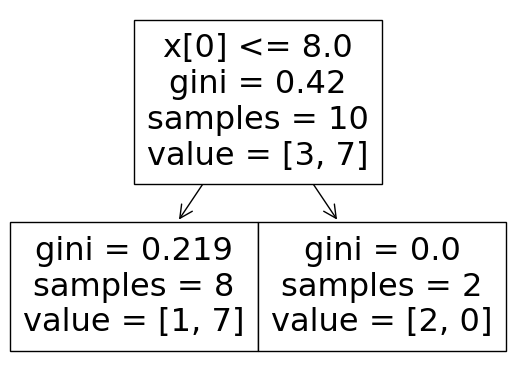

In [39]:
plot_tree(dt2)
plt.show()

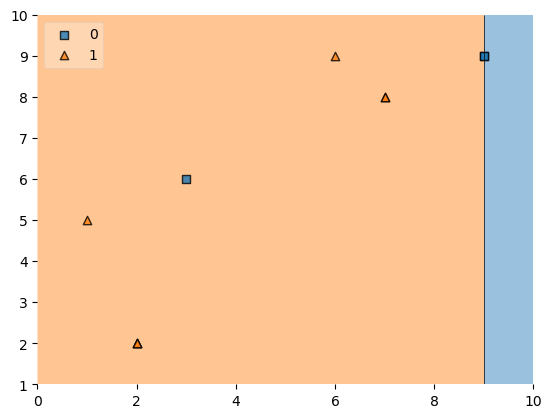

In [40]:
plot_decision_regions(x,y,clf=dt2, legend=2)
plt.show()

In [41]:
df2['y_pred'] = dt2.predict(x)

df2

,X1,X2,Label,Weights,y_pred
5,6,9,1,0.1,1
8,9,9,0,0.1,0
1,2,2,1,0.1,1
2,3,6,0,0.1,1
7,7,8,1,0.1,1
1,2,2,1,0.1,1
7,7,8,1,0.1,1
0,1,5,1,0.1,1
8,9,9,0,0.1,0
1,2,2,1,0.1,1


In [42]:
# So result imported On Row 1 is misclassified

alpha2 = calculate_model_weight(0.1)
alpha2

1.0986122886681098

In [43]:
def updated_row_weight(row, alpha=1.09):
    if row['Label']== row['y_pred']:
        return row['Weights']* np.exp(-alpha)
    else:
        return row['Weights']*np.exp(alpha)


df2['Updated_Weights'] = df2.apply(updated_row_weight, axis=1)
df2

,X1,X2,Label,Weights,y_pred,Updated_Weights
5,6,9,1,0.1,1,0.033622
8,9,9,0,0.1,0,0.033622
1,2,2,1,0.1,1,0.033622
2,3,6,0,0.1,1,0.297427
7,7,8,1,0.1,1,0.033622
1,2,2,1,0.1,1,0.033622
7,7,8,1,0.1,1,0.033622
0,1,5,1,0.1,1,0.033622
8,9,9,0,0.1,0,0.033622
1,2,2,1,0.1,1,0.033622


In [44]:
df2['Normalize_Weight'] = df2.Updated_Weights/ df2.Updated_Weights.sum()

df2

,X1,X2,Label,Weights,y_pred,Updated_Weights,Normalize_Weight
5,6,9,1,0.1,1,0.033622,0.056034
8,9,9,0,0.1,0,0.033622,0.056034
1,2,2,1,0.1,1,0.033622,0.056034
2,3,6,0,0.1,1,0.297427,0.495694
7,7,8,1,0.1,1,0.033622,0.056034
1,2,2,1,0.1,1,0.033622,0.056034
7,7,8,1,0.1,1,0.033622,0.056034
0,1,5,1,0.1,1,0.033622,0.056034
8,9,9,0,0.1,0,0.033622,0.056034
1,2,2,1,0.1,1,0.033622,0.056034


In [45]:
df2.Normalize_Weight.sum()

0.9999999999999999

In [46]:
df2['Cumsum_Upper'] = np.cumsum(df2.Normalize_Weight)
df2['Cumsum_Lower'] = df2.Cumsum_Upper - df2.Normalize_Weight

df2 = df2[['X1','X2','Label','Weights','y_pred','Updated_Weights','Normalize_Weight','Cumsum_Lower','Cumsum_Upper']]
df2

,X1,X2,Label,Weights,y_pred,Updated_Weights,Normalize_Weight,Cumsum_Lower,Cumsum_Upper
5,6,9,1,0.1,1,0.033622,0.056034,0.000000,0.056034
8,9,9,0,0.1,0,0.033622,0.056034,0.056034,0.112068
1,2,2,1,0.1,1,0.033622,0.056034,0.112068,0.168102
2,3,6,0,0.1,1,0.297427,0.495694,0.168102,0.663796
7,7,8,1,0.1,1,0.033622,0.056034,0.663796,0.719830
1,2,2,1,0.1,1,0.033622,0.056034,0.719830,0.775864
7,7,8,1,0.1,1,0.033622,0.056034,0.775864,0.831898
0,1,5,1,0.1,1,0.033622,0.056034,0.831898,0.887932
8,9,9,0,0.1,0,0.033622,0.056034,0.887932,0.943966
1,2,2,1,0.1,1,0.033622,0.056034,0.943966,1.000000


In [47]:
index_values = create_new_data(df2)

In [48]:
df3 = df2.iloc[index_values, [0,1,2,3]]

df3

,X1,X2,Label,Weights
1,2,2,1,0.1
0,1,5,1,0.1
1,2,2,1,0.1
8,9,9,0,0.1
0,1,5,1,0.1
8,9,9,0,0.1
1,2,2,1,0.1
0,1,5,1,0.1
1,2,2,1,0.1
8,9,9,0,0.1


In [49]:
dt3 = DecisionTreeClassifier(max_depth=1, random_state=2)

x = df3.iloc[:,0:2].values
y = df3.iloc[:,2].values

dt3.fit(x,y)

DecisionTreeClassifier(max_depth=1, random_state=2)

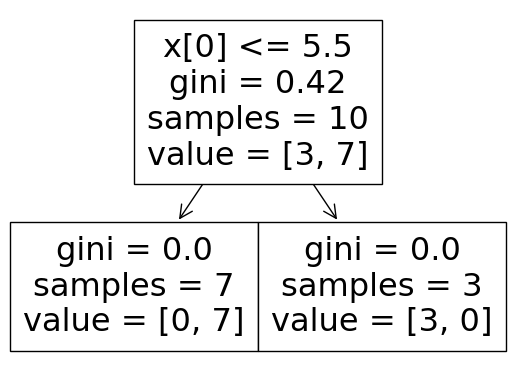

In [51]:
plot_tree(dt3)
plt.show()

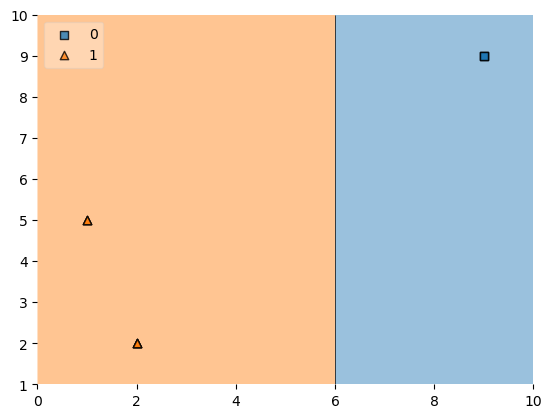

In [52]:
plot_decision_regions(x,y,clf=dt3, legend=2)
plt.show()

In [53]:
df3['y_pred'] = dt3.predict(x)

df3

,X1,X2,Label,Weights,y_pred
1,2,2,1,0.1,1
0,1,5,1,0.1,1
1,2,2,1,0.1,1
8,9,9,0,0.1,0
0,1,5,1,0.1,1
8,9,9,0,0.1,0
1,2,2,1,0.1,1
0,1,5,1,0.1,1
1,2,2,1,0.1,1
8,9,9,0,0.1,0


In [54]:
## Now if we aboserve there are no misclassified rows 
## Now in this case error = 0 and we try to calculate alpha3 it will give error as 1/0 
## So we will modify out functions

def calculate_model_weight(error):
    return 0.5* np.log((1-error)/(error+0.0000001)) ## add 0.000001 to avoid miscalcualtion

alpha3 = calculate_model_weight(0) # 

print('Model3 Weight : ', alpha3) 

Model3 Weight :  8.05904782547916


In [55]:
print(alpha1,alpha2, alpha3)

0.42364893019360184 1.0986122886681098 8.05904782547916


In [56]:
## Prediction

## We will compare the result from the basic data rows df, by picking up each row as Query point

df

,X1,X2,Label,Weights,y_pred,Updated_Weights,Normalize_Weights,Cumsum_Lower,Cumsum_Upper
0,1,5,1,0.1,1,0.065508,0.071475,0.000000,0.071475
1,2,2,1,0.1,1,0.065508,0.071475,0.071475,0.142950
2,3,6,0,0.1,0,0.065508,0.071475,0.142950,0.214425
3,4,8,1,0.1,0,0.152653,0.166559,0.214425,0.380983
4,5,1,0,0.1,0,0.065508,0.071475,0.380983,0.452458
5,6,9,1,0.1,0,0.152653,0.166559,0.452458,0.619017
6,6,5,0,0.1,0,0.065508,0.071475,0.619017,0.690492
7,7,8,1,0.1,0,0.152653,0.166559,0.690492,0.857050
8,9,9,0,0.1,0,0.065508,0.071475,0.857050,0.928525
9,9,2,0,0.1,0,0.065508,0.071475,0.928525,1.000000


In [57]:
Query = np.array([1,5]).reshape(1,2) # Taking Row 1

a = dt1.predict(Query)
a

array([1])

In [58]:
b = dt2.predict(Query)
b

array([1])

In [59]:
c= dt3.predict(Query)
c

array([1])

In [60]:
Add = alpha1*a + alpha2*b + alpha3*c
Add

array([9.58130904])

In [61]:
final_result = np.sign(Add)

In [62]:
final_result ## This is the correct predicitons 

array([1.])

In [63]:
Query2 = np.array([9,9]).reshape(1,2)

a = dt1.predict(Query2)
a

array([0])

In [64]:
b = dt2.predict(Query2)
b

array([0])

In [65]:
c= dt3.predict(Query2)
c

array([0])

In [66]:
Add2 =  alpha1*-1 + alpha2*b + alpha3*c # 0 will be treated as -1
final_result2 = np.sign(Add2)
final_result2

array([-1.])

In [ ]:
## So this is how predictions works and this is the complete algo of AdaBoosting 